# 1. Question or problem definition & Domain Research

## 1.1 Problem Definiton
### 1.1.1 Purpose
- 심리학 테스트 분석 알고리즘 개발
- 마키아벨리즘 심리테스트를 활용하여 테스트 참가자의 국가 선거 투표 여부 예측

## 1.2 Data
### 1.2.1 Dictionary

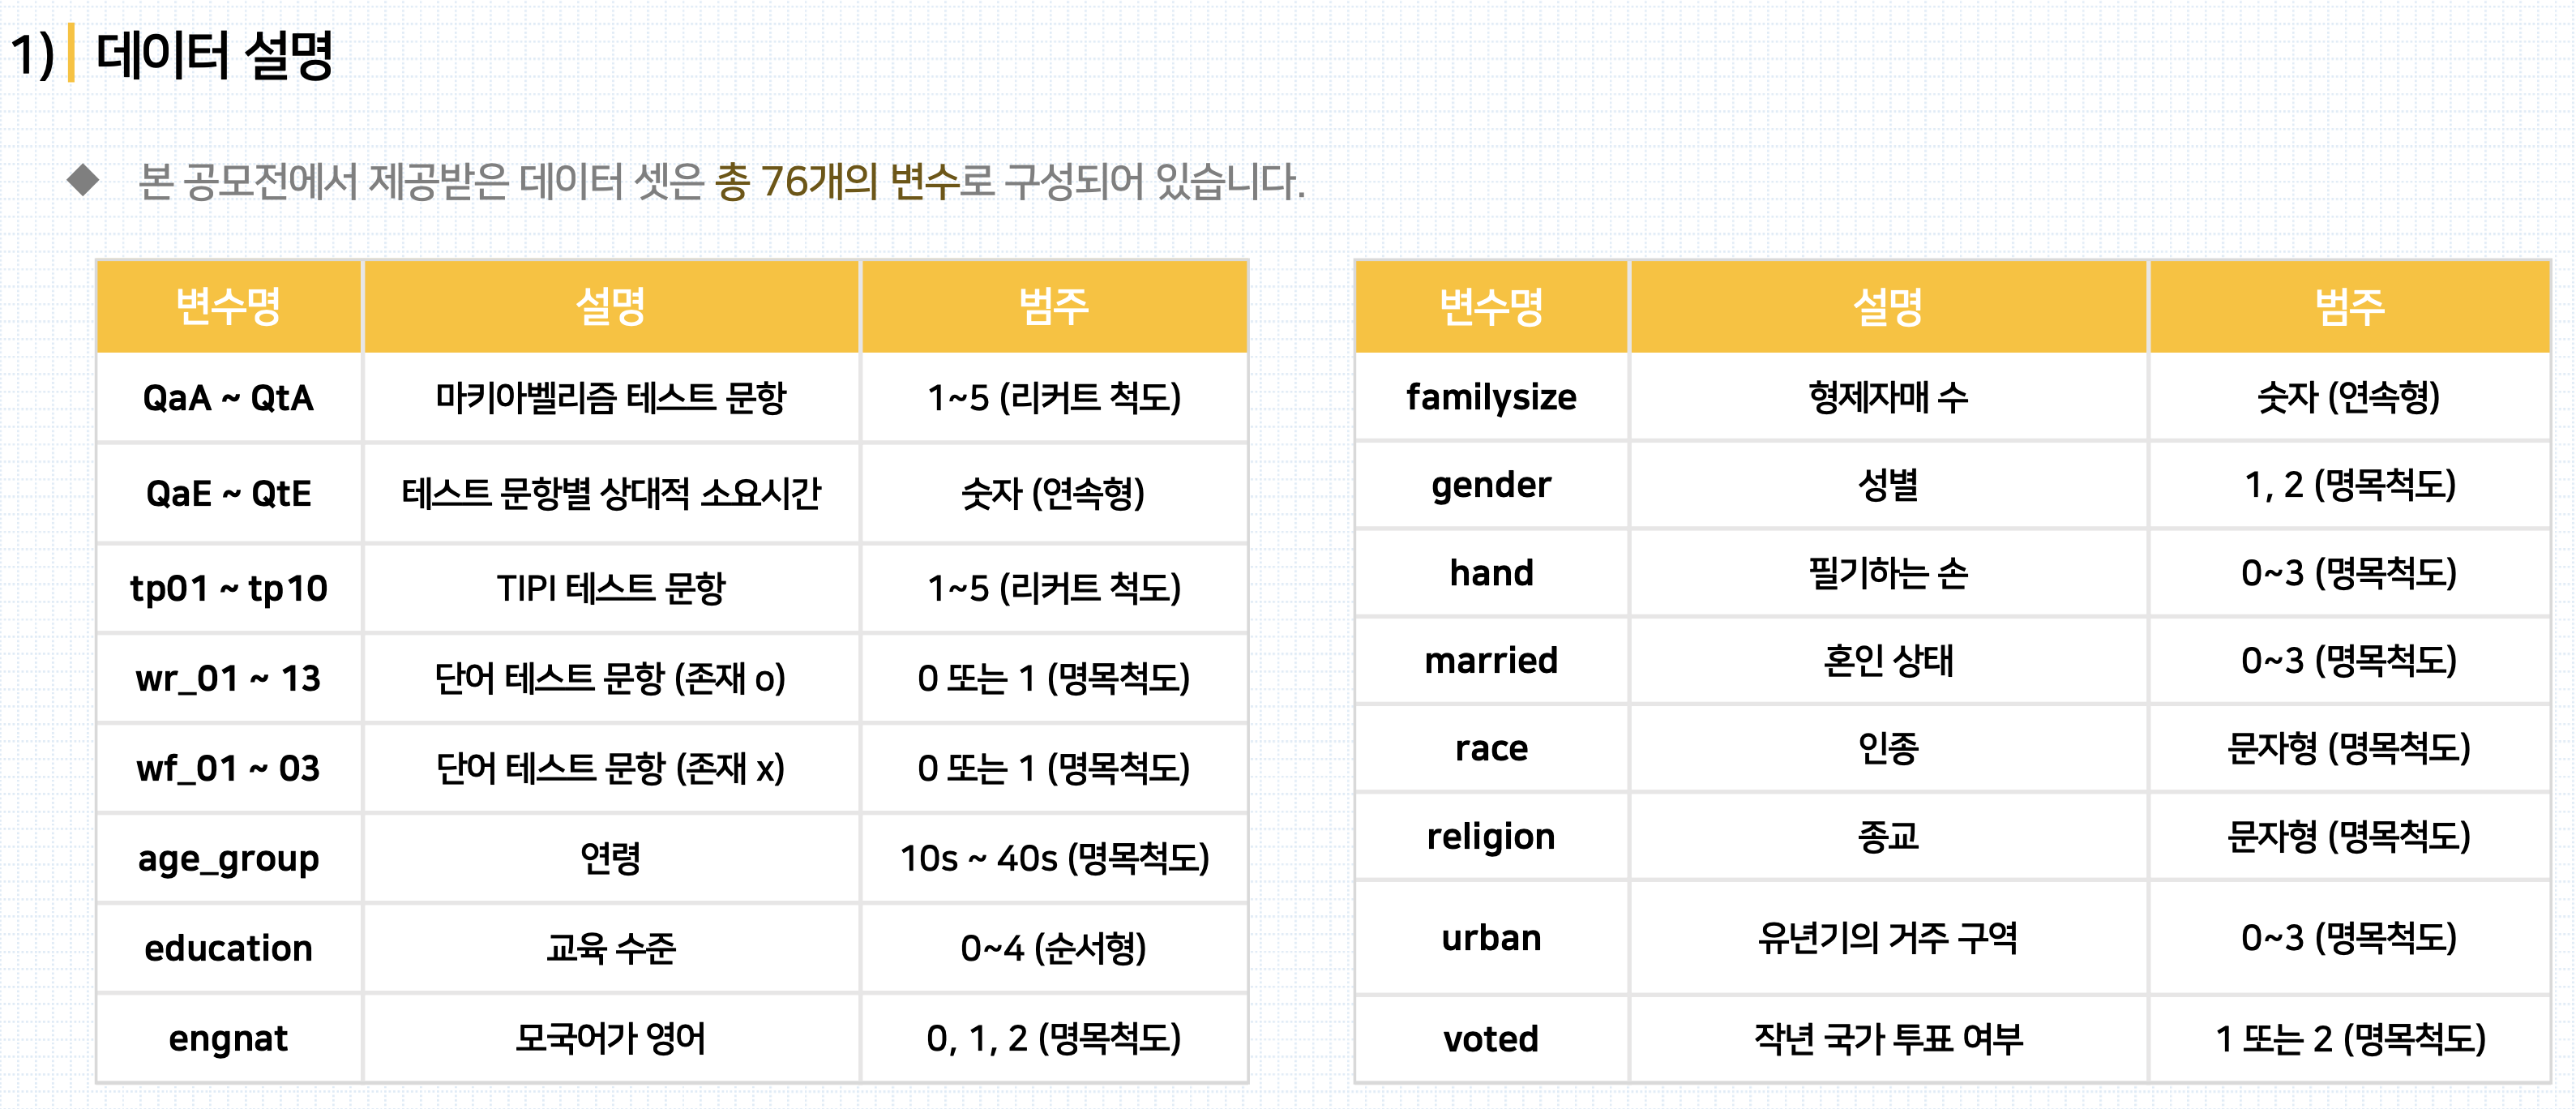

# 2. Acquire training and testig data : Data Loading

## 2.1 Package Loading

## 2.2 Data Loading

In [1]:
# Directory Set
import os
os.getcwd()
os.chdir('/Users/harryjeong/DA_Practice/KIC_Project')
os.getcwd()

'/Users/harryjeong/DA_Practice/KIC_Project'

In [2]:
import pandas as pd
train = pd.read_csv('Data/maki_train.csv')
test = pd.read_csv('Data/maki_test_x.csv')
combine = [train, test]
submission = pd.read_csv('Data/sample_submission.csv')

# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)

## 3.1 Analyze by describing data (Quick-view)

### 3.1.1 Check columns (name)

In [3]:
train.columns.values

array(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE',
       'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA',
       'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE',
       'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA',
       'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education',
       'engnat', 'familysize', 'gender', 'hand', 'married', 'race',
       'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07',
       'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype=object)

### 3.1.2 Check feature type
1) Catagorical
- Categorical: engnat, gender, hand, married, race, race, religion, W_Ques, urban, education, voted
- Ordinal: Q_Ques, TP_Ques, age_group

2) Numerical
- Continous: Q_Time
- Discrete: familysize

In [4]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


### 3.1.3 Check errors or typos

In [5]:
train.tail()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1
45531,45531,3.0,496,5.0,1827,5.0,754,3.0,1117,1.0,...,1,1,0,1,1,0,1,0,1,1


### 3.1.4 Check blank, null or empty values & data types
- integer or floats or strings (object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

### 3.1.5 Check distribution of numerical feature values
1) Q_Whole에서는 특별한 부분 안 보임
- Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)

2) W_Ques
- wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
- wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임

* feature grouping based on its origin

In [8]:
# Q_Whole : Q 변수 전체
Q_Whole = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
		       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE',
		       'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA',
		       'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE',
		       'QsA', 'QsE', 'QtA', 'QtE']
# Q_Ques : Q 변수 중 질문만
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
           'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
           'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
# Q_Time : Q 변수 중 소요시간만
Q_Time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

# W_Ques
W_Ques = ['wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
wf_Ques = ['wf_01', 'wf_02', 'wf_03']
wr_Ques = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

# human : 인구통계학적 컬럼
human = ['education', 'engnat', 'familysize', 'hand', 'married', 'urban',
         'gender', 'age_group', 'race', 'religion']

In [9]:
train[Q_Ques].describe()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,2.904463,3.662347,1.749078,2.317952,2.168145,2.560595,2.317952,3.157691,3.575529,3.813933,4.325727,3.509620,2.632896,3.217232,3.071752,2.840464,2.823487,3.432948,3.225687
std,1.196952,1.566142,1.431494,1.043625,1.369205,1.348653,1.510600,1.460813,1.481740,1.361220,1.372551,1.146992,1.375134,1.473022,1.476414,1.489744,1.404342,1.424383,1.374938,1.521603
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)
train[Q_Time].describe().T.drop(['max', 'std', 'count', 'min'], axis = 1)

,mean,25%,50%,75%
QaE,945.357046,404.0,557.0,827.0
QbE,2189.588575,875.0,1218.0,1838.0
QcE,1484.294518,651.0,899.0,1335.0
QdE,1490.672231,679.0,931.0,1355.0
QeE,1899.292278,834.0,1154.0,1656.0
QfE,1850.650268,504.0,712.0,1078.0
QgE,1284.607946,549.0,772.0,1150.0
QhE,4584.272138,1077.0,1464.0,2090.0
QiE,4068.433827,1259.0,1800.0,2761.0
QkE,2038.985790,859.0,1178.0,1721.0


In [11]:
# wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
# wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임
train[W_Ques].describe().loc['mean', :].sort_values(ascending = False)

wr_08    0.972195
wr_12    0.947729
wr_10    0.946104
wr_07    0.938900
wr_02    0.934793
wr_13    0.927040
wr_05    0.895722
wr_04    0.868708
wr_01    0.709721
wr_11    0.395195
wr_06    0.328538
wr_03    0.208974
wr_09    0.202824
wf_02    0.163665
wf_03    0.118356
wf_01    0.079592
Name: mean, dtype: float64

In [12]:
train[human].describe()

,education,engnat,familysize,hand,married,urban
count,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000
mean,2.544474,1.271326,4.716689e+04,1.170715,1.387112,2.180401
std,0.941328,0.448436,1.006402e+07,0.468883,0.639987,0.762647
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
50%,3.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
75%,3.000000,2.000000,3.000000e+00,1.000000,2.000000,3.000000
max,4.000000,2.000000,2.147484e+09,3.000000,3.000000,3.000000


## 3.2 Assumption in 5-fundamental ways
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### 3.2.1 Correlating.
Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
- correlation btw dependant variable and each explanatory variable

### 3.2.2 Completing.
Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
- there is no missing values

### 3.2.3 Correcting.
Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
- Q_Ques may be dropped as it contains relative number of time (each Q_Time's total is same) & it is hard to find the relation btw Answering time & Reliability.
- W_Ques may be dropped as we could not find any relation with voted or other features.
- some of features in human group may be dropped as it does not have any relation with voted or others: hand, engnat, familysize.

### 3.2.4 Creating.
Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
- We may create a new feature called mach_score based on the concept of the maki test.
- We may create a new feature called tp_score based on the concpet of TIPI test.

### 3.2.5 Classifying.
Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
- 10s are more likely not to have voted. (under the voting age)
- The educated are more likely to have voted.
- The people with High mach_score are more likely to have voted.

### Creating mach_score

In [13]:
# mach_score
# 음의 방향인 질문들을 한 방향으로 바꿔주기
for data in combine :
    flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
    for flip in flipping_columns: 
        data[flip] = 6 - data[flip]
    
    flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
    for flip in flipping_secret_columns: 
        data[flip] = 6 - data[flip]
    
    # 컬럼에 추가    
    data['mach_score'] = data[Q_Ques].sum(axis = 1)

### Creating tp_score

In [97]:
# TP_score 계산 후 5개 성향으로 그룹화
# 원본 데이터 구성
# 0: 완전 동의 1:약간 동의 ...~ 5: 약간 비동의 6: 완전 비동의 , 7: 무응답 

# 7에서 빼주면 
# 7: 완전 동의 6: 약간 동의 ....~2:약간 비동의 1: 완전 비동의   0: 무응답   

for data in combine : 
    fea2 = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
    data.loc[:,fea2] = data.loc[:,fea2].applymap(lambda x: 7 - x)
    
    # 짝수 질문은 reverse가 필요함 
    # 무응답 은 그대로 두고  나머지 8에서 빼줌
    # 짝수질문만 
    # 1: 완전동의 2: 약간 동의 ... ~6: 약간 비동의 7: 완전 동의    0: 무응답    
    fea3 = ['tp02','tp04','tp06','tp08','tp10']
    data.loc[:,fea3] = data.loc[:,fea3].applymap(lambda x: 0 if x == 0 else 8 - x)

    # TIPI 계산
    data['sung']  = (data.tp03 + data.tp08)/2
    data['chin']= (data.tp07 + data.tp02)/2
    data['jung'] = (data.tp09 + data.tp04)/2
    data['kyung'] = (data.tp05 + data.tp10)/2
    data['why'] =(data.tp01 + data.tp06)/2
tp_score = ['sung', 'chin', 'jung', 'kyung', 'why']

## 3.3 Analyze by pivoting features
### Dependant variable vs each Explanatory variable
- To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.
- We can only do so at this stage for features which do not have any empty values.
It also makes sense doing so only for features which are categorical (human), ordinal (Q_Ques, TP_Ques, age_group) or discrete (familysize) type.

### Summary
- The voted rate is 0.55. (24898 voted, 20634 not voted out of 45532).
- education, age_group, married are strongly related to the voted rate. (classifying)
- engnat, gender, hand, race, religion, urban, familysize are not clearly related to the voted rate. (completing for familysize, creating)

In [15]:
# voted -> (2, 1) -> (1, 0)
import numpy as np
voted = np.where(train.voted == 2, 0, 1)
train['voted'] = voted

In [16]:
a1 = sum(train['voted'] == 1) / len(train['voted'])
a2 = sum(train['voted'] == 1)
a3 = sum(train['voted'] == 0)
a4 = len(train['voted'])

print('The voted rate is %.2f. (%d voted, %d not voted out of %d)' \
% (a1, a2, a3, a4))

The voted rate is 0.45. (20634 voted, 24898 not voted out of 45532)


In [17]:
# By using 'mean' we can see the rate of voted and not voted.
# People with Higher education voted more. **
train[['education', 'voted']].groupby(['education'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,education,voted
4,4,0.619684
3,3,0.596506
0,0,0.477273
2,2,0.367033
1,1,0.049725


In [18]:
# not clear clue
train[['engnat', 'voted']].groupby(['engnat'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,engnat,voted
1,1,0.462603
2,2,0.428606
0,0,0.376623


In [19]:
# not clear clue
train[['gender', 'voted']].groupby(['gender'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,gender,voted
0,Female,0.460427
1,Male,0.446794


In [20]:
# The older, the more voted. **
train[['age_group', 'voted']].groupby(['age_group'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,age_group,voted
0,+70s,0.736170
6,60s,0.728643
5,50s,0.670128
4,40s,0.642051
3,30s,0.588821
2,20s,0.530329
1,10s,0.162786


In [21]:
# not clear clue
train[['hand', 'voted']].groupby(['hand'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,hand,voted
2,2,0.459506
1,1,0.454683
3,3,0.407156
0,0,0.366460


In [22]:
# People with currently married(2) & previously married(3) are more likely to have voted. **
train[['married', 'voted']].groupby(['married'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,married,voted
2,2,0.666567
3,3,0.577546
1,1,0.370428
0,0,0.322581


In [23]:
# White & Asians are more likely to have voted, but not clearly related.
train[['race', 'voted']].groupby(['race'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,race,voted
6,White,0.504224
3,Indigenous Australian,0.452830
4,Native American,0.412409
2,Black,0.402214
5,Other,0.377598
1,Asian,0.295435
0,Arab,0.290598


In [24]:
# not clear clue
train[['religion', 'voted']].groupby(['religion'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,religion,voted
6,Christian_Protestant,0.565333
8,Jewish,0.550308
3,Christian_Catholic,0.473488
5,Christian_Other,0.460385
0,Agnostic,0.457398
1,Atheist,0.427296
10,Other,0.417191
7,Hindu,0.386984
4,Christian_Mormon,0.380841
2,Buddhist,0.378824


In [25]:
# not clear clue
train[['urban', 'voted']].groupby(['urban'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,urban,voted
0,0,0.509317
1,1,0.507128
2,2,0.458455
3,3,0.419598


In [26]:
# not clear clue
# found NA
train[['familysize', 'voted']].groupby(['familysize'], as_index = False).mean().sort_values(by = 'voted', ascending = False)

,familysize,voted
21,30,1.000000
25,999,1.000000
24,100,1.000000
17,17,1.000000
13,13,0.636364
15,15,0.625000
11,11,0.564103
14,14,0.555556
12,12,0.523810
7,7,0.519380


## 3.4 Analyze by visualizing data in 5 ways
- confirming some of our assumptions using visualizations for analyzing the data.

### 3.4.0 Heatmap
Check correlation btw features
- (+) Relation : education & married, voted & married, voted & education, mach_score & chin
- (-) Relation : mach_score & married

<AxesSubplot:>

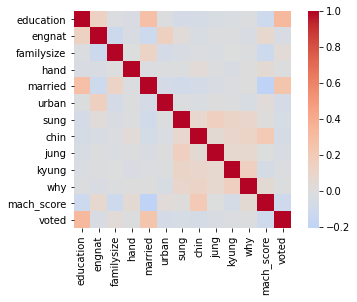

In [113]:
# (+) Relation : education & married, voted & married, voted & education, mach_score & chin
# (-) Relation : mach_score & married
corr_fea = human + tp_score + ['mach_score'] + ['voted']
corr = train[corr_fea].corr(method = 'spearman')
sns.heatmap(corr, cmap = 'coolwarm', square = True, center = 0)

### 3.4.1 Correlating based on feature types
mach_score
- 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
tp_score : 큰 의미 없어보임
age_group + mach_score
- 10s are the most, but most did not vote and they tend to have high mach_score
- 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
- It seems high mach_score provoke low vote rate and the low is opposite.

education
married

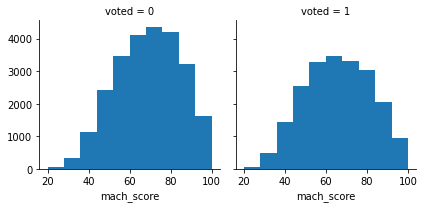

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(train, col = 'voted')
g.map(plt.hist, 'mach_score')

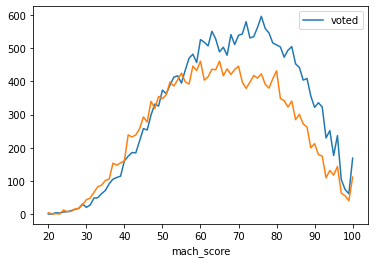

In [61]:
# mach_score가 50점 이상 높아지면 점점 not voted가 많아짐 => classifying
train[['mach_score', 'voted']][train['voted'] == 0].groupby('mach_score').count().plot()
plt.plot(train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count())

In [93]:
# mach_score 56점 기준으로 not voted가 voted보다 많아지며 그 추세는 계속됨
# 그러나 변동폭이 있어서 그 차이가 일정하게 늘어나는 것은 아니라 classifying하기 쉽지 않음
v1 = train[['mach_score', 'voted']][train['voted'] == 0].groupby('mach_score').count() - train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count()
v1[v1.voted > 0]

,voted
mach_score,
22.0,3
23.0,3
26.0,2
29.0,2
48.0,13
50.0,26
51.0,3
53.0,27
54.0,12


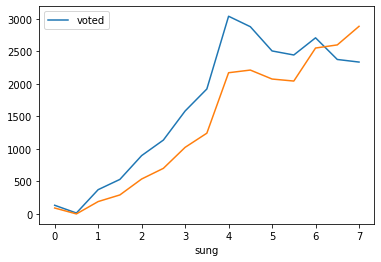

In [62]:
# 개별 : 점수가 높을수록 투표율/비투표율 높아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['sung', 'voted']][train['voted'] == 0].groupby('sung').count().plot()
plt.plot(train[['sung', 'voted']][train['voted'] == 1].groupby('sung').count())

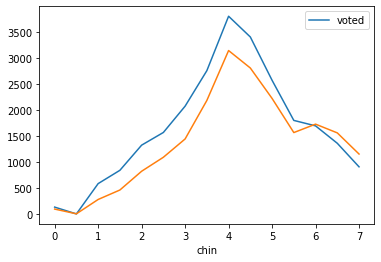

In [58]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 0].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count())

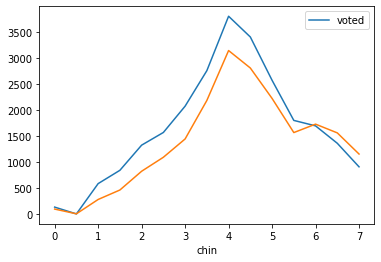

In [68]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 0].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count())

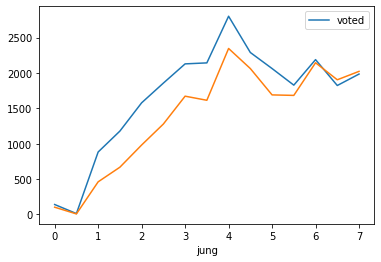

In [66]:
# 변별력 없음
train[['jung', 'voted']][train['voted'] == 0].groupby('jung').count().plot()
plt.plot(train[['jung', 'voted']][train['voted'] == 1].groupby('jung').count())

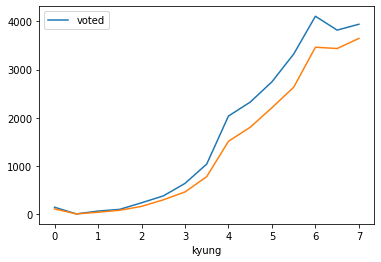

In [67]:
# 변별력 없음
train[['kyung', 'voted']][train['voted'] == 0].groupby('kyung').count().plot()
plt.plot(train[['kyung', 'voted']][train['voted'] == 1].groupby('kyung').count())

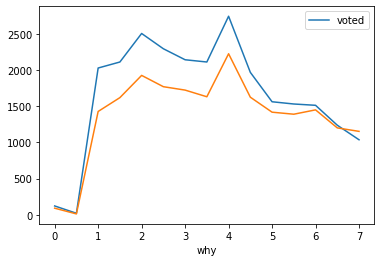

In [69]:
# 변별력 없음
train[['why', 'voted']][train['voted'] == 0].groupby('why').count().plot()
plt.plot(train[['why', 'voted']][train['voted'] == 1].groupby('why').count())

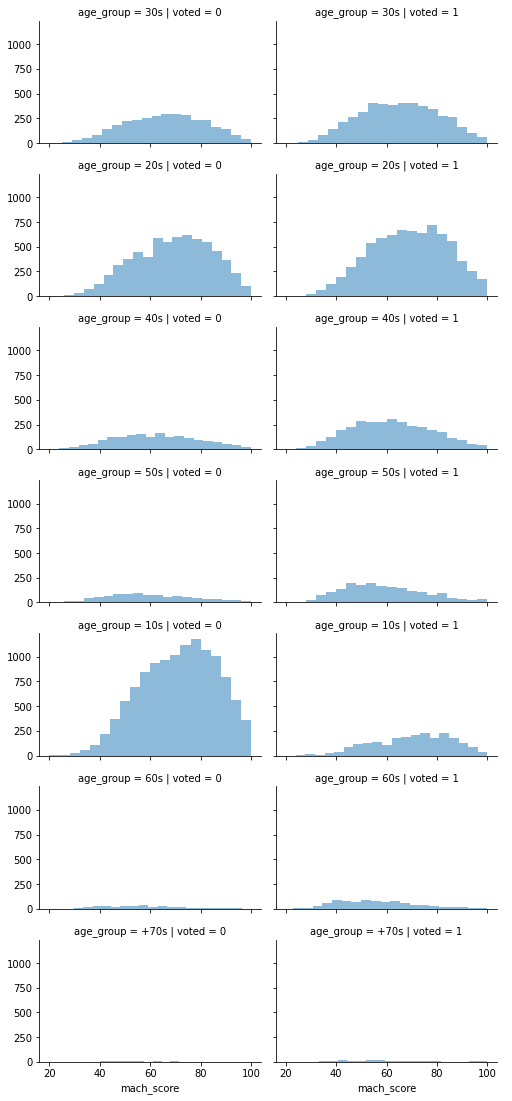

In [96]:
# 10s are the most, but most did not vote and they tend to have high mach_score
# 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
# It seems high mach_score provoke low vote rate and the low is opposite.
grid = sns.FacetGrid(train, col = 'voted', row = 'age_group', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'mach_score', alpha = .5, bins = 20)
grid.add_legend()

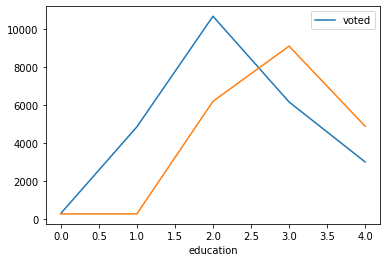

In [121]:
# Education might divide into two groups at 2.0
train[['education', 'voted']][train['voted'] == 0].groupby('education').count().plot()
plt.plot(train[['education', 'voted']][train['voted'] == 1].groupby('education').count())

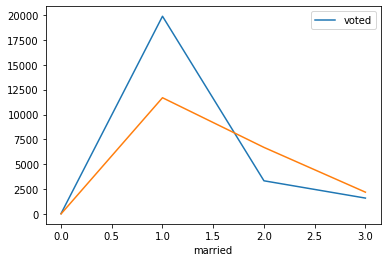

In [122]:
# Education might divide into two groups at 2.0
train[['married', 'voted']][train['voted'] == 0].groupby('married').count().plot()
plt.plot(train[['married', 'voted']][train['voted'] == 1].groupby('married').count())

ValueError: len(index) != len(labels)